## Michael Robinson
## DSC 478
## Final Project
## 11-15-23

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn import svm
from sklearn import tree
from sklearn import linear_model
from sklearn import neural_network
from sklearn import naive_bayes
from sklearn import ensemble
from datetime import datetime

### My proposed project
I intend to do a data analysis project based on the “robbery to people in Medellin Colombia” dataset on Kaggle (https://www.kaggle.com/datasets/darwinberrio/robbery-to-people-in-medellincolombia). My motivation is a vacation planned to a neighboring city (Bogota, Colombia) with a friend after this class (in the end of November). We will likely spend a day or two in Medellin and it would be both useful and insightful to understand who is targeted for theft, the methods by which it takes place and what is being stolen. (If anything, it may be a useful report to send to my overly-worrisome parents, assuming my results aren’t concerning). Although the usability of the dataset is scored only at a 3.53 on Kaggle, after a preliminary investigation I am satisfied with it and think it will be sufficient for thorough analysis. I believe the data card section on Kaggle is inaccurate (or some parsing on Kaggle may be incorrect) as it stated several variables were completely missing, while my investigation uncovered that they are actually not missing at all. The database has robberies reported from 2006 to 2019 and has 18 useful attributes such as the victim’s age and sex in addition to locations of where and when the crime occurred. I can read Spanish at an intermediate level; the dataset being in Spanish, will provide me with additional practice. I intend to supplement my knowledge of the language with google translate, ChatGPT and with a friend who is fluent. This will provide me with insight about the importance of each attribute and the meaning of the categorial responses. After a very brief and preliminary cleaning, the dataset information is shown below.
In addition to common data analysis methods such as exploration, visualization and preprocessing. I intend to choose a dependent variable and perform classification/ regression as well. I will explore different modalities, such as SVM/ SVR, ANNs, random forests, etc. (likely by implementing standard sklearn models). The most appealing options to me would be location (such as longitude and latitude) or transportation mode (medio_transporte) that the person got robbed while on. Transportation mode has three classes, while neighborhood (nombre_barrio) has several hundred; I think a three-class problem is much more feasible. I also will perform clustering  on the dataset to look for patterns. I intend to use python and Jupyter notebooks for implementation. I don’t foresee any uncommon libraries or third party applications that I will need to use to be successful on this project. Overall, I hope to take away a better understanding of robberies in Medellin, Colombia. 


### Feedback from Dave
This is by far the most original project I have seen.  I too have an amateur level of Spanish.  I don't know what fecha_hecho, edad, codigo, or sede receptora means.  K means clustering will hopefully find clusters worth predicting.  In the case that the clusters do not make sense after doing a centroid analysis, I have a plan B to generate labels for prediction.  Take your robbery variable and do a distribution of the counts and bin your labels based on the distribution.  Using percentiles would be a good start.  I like the fact your are personally motivated due to your upcoming trip.  Hopefully you find patterns as how to avoid a bad situation.  My sister lived in Venezuela for 8 months due to her job in the 90s.  She had some stories where kids would rip earings out of a woman's ear walking down the streets of Caracas so she never wore jewelry again after seeing it.  Hay muchos anos que hable in Espanol y he olvidado mucho!  LOL!

### Summarized project goal:
Crime and robbery is prevalent in Medellin, Colombia - particularly during public transportation for both locals and tourists. This project will investigate robbery patterns for various transportation methods (metro, bus and taxi) in Medellin, Colombia by performing:
1. Data visualization to identify patterns
2. Unsupervised learning to find meaningful clusters
3. Supervised learning to determine which transportation method was the robbery committed on, given other external circumstances (such as date of crime, what was stolen, the victim's age and gender, and the neighborhood)

I will also provide explanations for some of the data insights, by mentioning the safety tips I've learned about for traveling in Colombia.

In [2]:
# Quick look at the raw data
raw_df = pd.read_csv("/Users/robinson/Documents/Career stuff/DePaul University/classes/DSC 478/crime_medellin.csv", delimiter=";")
raw_df


,seguridad.fecha_hecho,seguridad.latitud,seguridad.longitud,seguridad.sexo,seguridad.edad,seguridad.estado_civil,seguridad.medio_transporte,seguridad.nivel_academico,seguridad.testigo,seguridad.conducta,...,seguridad.conducta_especial,seguridad.arma_medio,seguridad.nombre_barrio,seguridad.codigo_barrio,seguridad.codigo_comuna,seguridad.lugar,seguridad.sede_receptora,seguridad.bien,seguridad.categoria_bien,seguridad.color
0,01/01/2017 16:00,627.623.616,-7.555.353.312,Hombre,37,Casado(a),Taxi,Sin dato,Sin dato,Hurto a persona,...,De celular,Arma de fuego,Campo Valdés No.1,#0410,4,Vía pública,Aranjuez,Celular,Tecnología,Negro
1,01/01/2017 16:00,621.907.115,-7.560.299.601,Mujer,29,Unión marital de hecho,Taxi,Sin dato,Sin dato,Hurto a persona,...,No,No,La Loma de los Bernal,#1611,16,Vía pública,Belén,Elementos escolares,Elementos escolares,Sin dato
2,01/01/2017 16:00,621.907.115,-7.560.299.601,Mujer,29,Unión marital de hecho,Taxi,Sin dato,Sin dato,Hurto a persona,...,No,No,La Loma de los Bernal,#1611,16,Vía pública,Belén,Computador,Tecnología,Sin dato
3,02/01/2017 10:30,624.275.379,-7.554.836.478,Hombre,36,Casado(a),Taxi,Sin dato,Sin dato,Hurto a persona,...,A taxista,Arma de fuego,El Pinal,#0810,8,Vía pública,Villa Hermosa,Peso,"Dinero, joyas, piedras preciosas y título valor",Sin dato
4,02/01/2017 10:30,624.275.379,-7.554.836.478,Hombre,36,Casado(a),Taxi,Sin dato,Sin dato,Hurto a persona,...,A taxista,Arma de fuego,El Pinal,#0810,8,Vía pública,Villa Hermosa,Celular,Tecnología,Blanco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17600,19/01/2018 17:56,618.646.041,-7.554.847.747,Hombre,25,Soltero(a),Taxi,Sin dato,Sin dato,Hurto a persona,...,No,Arma de fuego,Las Palmas S.E.,#9001,90,Vía pública,Buenos Aires,Accesorios prendas de vestir,Prendas de vestir y accesorios,Sin dato
17601,01/11/2018 19:20,628.918.563,-755.758.665,Mujer,48,Casado(a),Taxi,Sin dato,Sin dato,Hurto a persona,...,Sin dato,Arma de fuego,La Esperanza,#0605,6,Residencia,Doce de Octubre,Letra de cambio,Documentos,Sin dato
17602,30/10/2018 12:00,621.087.481,-7.555.705.747,Mujer,35,Divorciado(a),Taxi,Sin dato,Sin dato,Hurto a persona,...,De celular,Arma de fuego,Las Lomas No.2,#1407,14,Vía pública,Poblado,Peso,"Dinero, joyas, piedras preciosas y título valor",Sin dato
17603,09/10/2018 4:00,620.089.773,-7.558.858.693,Mujer,25,Divorciado(a),Taxi,Sin dato,Sin dato,Hurto a persona,...,Sin dato,Arma de fuego,La Colina,#1511,15,Bus de servicio público,Belén,Peso,"Dinero, joyas, piedras preciosas y título valor",Sin dato


In [3]:
# When were these robberies committed? What is the time frame of this data: 2006 to 2019
print(raw_df["seguridad.fecha_hecho"].min(), "\t", raw_df["seguridad.fecha_hecho"].max())

01/01/2006 2:20 	 31/12/2019 7:00


In [4]:
# Let's get some general info and look for Nans
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17605 entries, 0 to 17604
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   seguridad.fecha_hecho        17605 non-null  object
 1   seguridad.latitud            16878 non-null  object
 2   seguridad.longitud           16878 non-null  object
 3   seguridad.sexo               17605 non-null  object
 4   seguridad.edad               17605 non-null  int64 
 5   seguridad.estado_civil       17605 non-null  object
 6   seguridad.medio_transporte   17605 non-null  object
 7   seguridad.nivel_academico    17605 non-null  object
 8   seguridad.testigo            17605 non-null  object
 9   seguridad.conducta           17605 non-null  object
 10  seguridad.modalidad          17605 non-null  object
 11  seguridad.conducta_especial  17605 non-null  object
 12  seguridad.arma_medio         17605 non-null  object
 13  seguridad.nombre_barrio      17

In [5]:
# looking at the columns
# we'll remove the word seguridad meaning safet/ security since all columns have this
df = pd.DataFrame()
for col in list(raw_df.columns):
    num = raw_df[col].nunique()
    if num != 1:
        df[col.replace("seguridad.", "")] = raw_df[col]
    print(str(col).replace("seguridad.", ""), num)

fecha_hecho 10649
latitud 10881
longitud 10712
sexo 3
edad 81
estado_civil 6
medio_transporte 3
nivel_academico 1
testigo 1
conducta 1
modalidad 19
conducta_especial 13
arma_medio 6
nombre_barrio 294
codigo_barrio 316
codigo_comuna 22
lugar 68
sede_receptora 17
bien 170
categoria_bien 36
color 16


Let's provide translation now to see which columns are relevant or not:


- 0 date and time of robbery
- 1 latitude
- 2 longitude
- 3 sex of victim
- 4 age of victim
- 5 marital status of victim
- 6 transportation mode involved - will be used as dependent variable
- 7 modality
- 8 special conduct
- 9 weapon
- 10 neighborhood
- 11 neighborhood code
- 12 community code
- 13 place
- 14 receiving police station office
- 15 stolen object
- 16 stolen object category
- 17 color (appears to be some sort of classification code)

The goal of this project is practicality and given I will not be keeping track of my longitude/ latitude while traveling - I will use neighborhood instead and drop the latitude, longitude, neighborhood code and community code columns

Marital status seems irrelevant. The receiving police office is captured in the neighborhood. I will drop these columns.

Also color is simply color coding and not useful. Special conduct is only present in about 1/3rd of the data.
These two columns will be removed.

Finally stolen object cateogry will help us be more general, I will drop stolen object column.

Lastly, given I will be predicting the transportation method involved in the robbery, keeping lugar (place) would make this prediction far too easy as some places are metro station, metro station plus, etc. I will drop the place column as well

After dropping we now have the meat and potatoes of the dataset... the columns are:

X:
- date/ time [fecha_hecho]
- age of victim [edad]
- sex of victim [sexo]
- modality [modalidad]
- weapon [arma_medio]
- neighborhood [nombre_barrio]
- stolen object category [categoria_bien]

y:
- transportation method [medio_transporte]

In [6]:
df.drop(["estado_civil", "codigo_barrio", "latitud", "longitud", "codigo_comuna", "sede_receptora", "color", "bien", "conducta_especial", "lugar"], axis=1, inplace=True)

# Now also drop NAN rows
df.replace("Sin dato", pd.NA, inplace=True)
df.dropna(inplace=True)

In [7]:
# For the numerical variables... convert age and date/ time of robbery to integers
df["edad"] = df["edad"].astype(int)
func = lambda m: (datetime.strptime(m, "%d/%m/%Y %H:%M")).timestamp()
df["fecha_hecho"] = df["fecha_hecho"].apply(func)


In [8]:
# Let's explore the categorical variables
for col in df.columns:
    if df[col].dtype == "object":
        print(col, df[col].nunique())
        
# 293 neighborhoods!

sexo 2
medio_transporte 3
modalidad 18
arma_medio 5
nombre_barrio 293
categoria_bien 35


In [9]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col, df[col].unique(),"\n")

sexo ['Hombre' 'Mujer'] 

medio_transporte ['Taxi' 'Metro' 'Autobus'] 

modalidad ['Atraco' 'Descuido' 'Cosquilleo' 'Raponazo' 'Comisión de delito' 'Engaño'
 'Escopolamina' 'Clonación de tarjeta' 'Rompimiento cerraduta'
 'Suplantación' 'Miedo o terror' 'Forcejeo' 'Halado' 'Llamada millonaria'
 'Rompimiento de ventana' 'Retención de tarjeta' 'Simulando necesidad'
 'Fleteo'] 

arma_medio ['Arma de fuego' 'No' 'Objeto contundente' 'Arma cortopunzante'
 'Escopolamina'] 

nombre_barrio ['Campo Valdés No.1' 'La Loma de los Bernal' 'El Pinal' 'Santa Fé'
 'Tricentenario' 'Brasilia' 'El Tesoro' 'Córdoba' 'Barrio Colombia'
 'Jesús Nazareno' 'Belén' 'La Candelaria' 'López de Mesa' 'Barrio Caycedo'
 'Estación Villa' 'La Francia' 'Suramericana' 'Patio Bonito'
 'La Castellana' 'Héctor Abad Gómez' 'Cucaracho' 'La Colina' 'El Poblado'
 'Laureles' 'Picacho' 'Carlos E. Restrepo' 'Boston' 'Castilla'
 'Florida Nueva' 'Barrio Colón' 'San Benito' 'Calasanz'
 'Santa María de los Ángeles' 'Campo Valdés No.2' 

 So quite a lot of different categories for some of these variables. We'll provide translations to them as we explore them more.

/var/folders/2h/sr2g_yys3mz_92v191sf6k1c0000gp/T/ipykernel_3616/1425580346.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax11.set_xticklabels(df["arma_medio"].unique(), rotation=45)


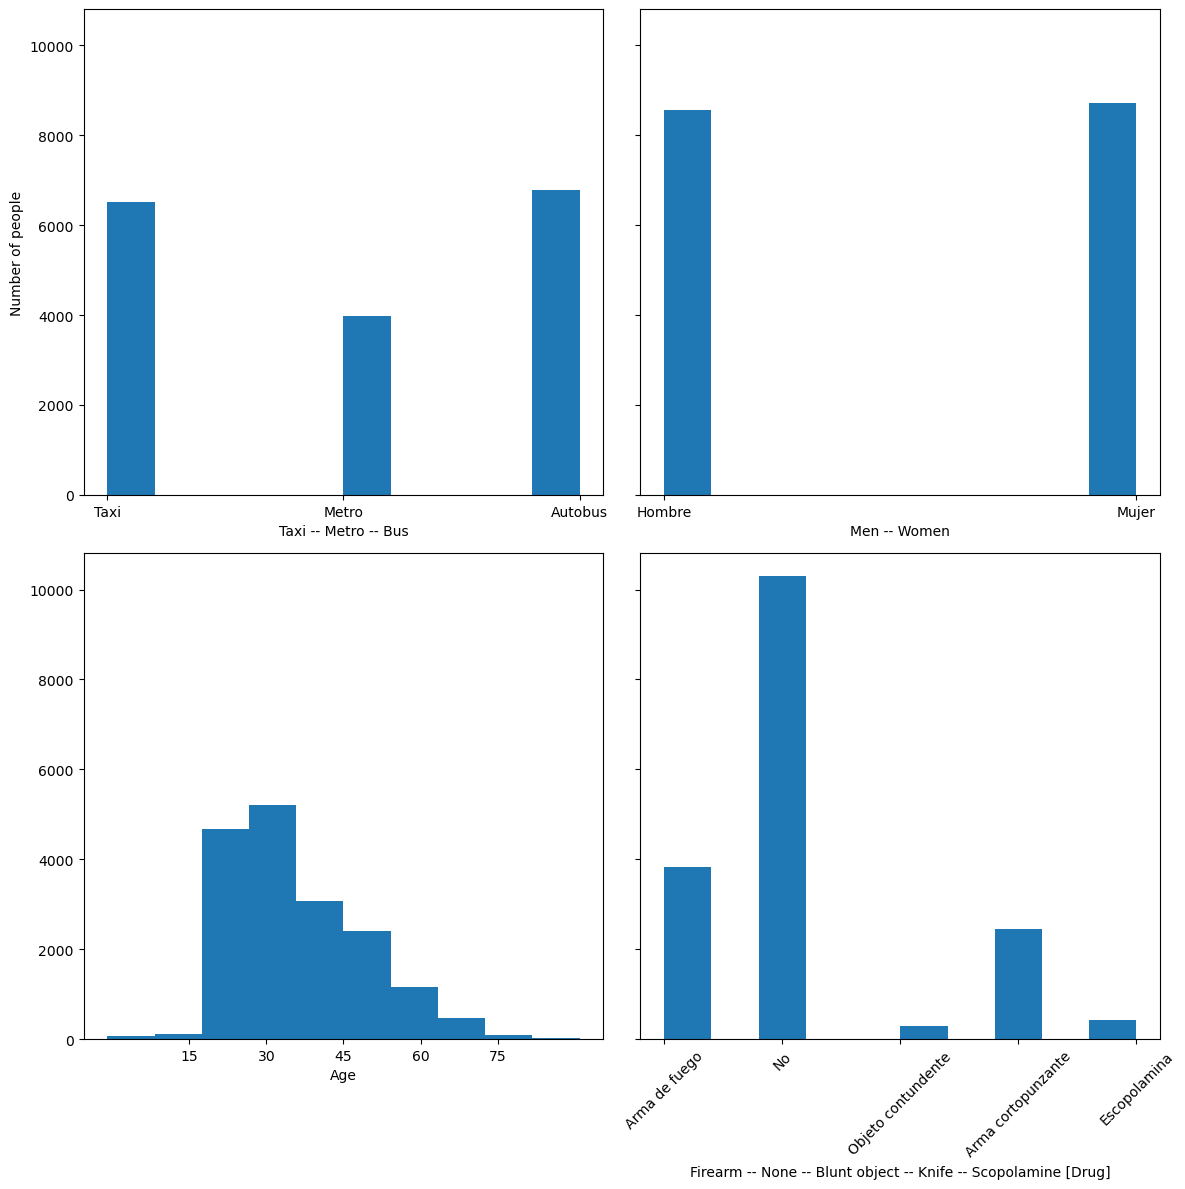

In [10]:
# Let's look at how transportation mode, gender, weapon and age break down
# Matplot throwing a warning here, something to do with my formatting of the plot

f, ((ax00, ax01), (ax10, ax11)) = plt.subplots(2, 2, sharey=True, figsize=(12,12))
ax00.hist(df["medio_transporte"])
ax00.set_xlabel("Taxi -- Metro -- Bus")
ax00.set_ylabel("Number of people")
ax01.hist(df["sexo"])
ax01.set_xlabel("Men -- Women")
ax10.hist(df["edad"], bins=10)
ax10.set_xticks([15, 30, 45, 60, 75])
ax10.set_xlabel("Age")
ax11.hist(df["arma_medio"])

ax11.set_xlabel("Firearm -- None -- Blunt object -- Knife -- Scopolamine [Drug]")
ax11.set_xticklabels(df["arma_medio"].unique(), rotation=45)

plt.tight_layout()
fig = plt.show()

So we can see... the buses seem to be the most dangerous with the metro being the safest. Men and women are targeted pretty equally. Middle-aged folks have the greatest chance of being robbed (but they are also more likely to be out and about). Finally most robbers are not showing a weapon (and probably pickpocketing or just demanding and being intimidating to get goods)

Slightly horrofied by scopolamine... research uncovered it is a date rape drug, however also used a date robbery drug, causing confusion, blackout, etc. In high doses it can result in death. It is VERY prevalent in Bogota, the city I will be spending most of my time in... under NO circumstances accept food or drink from someone you do not know...

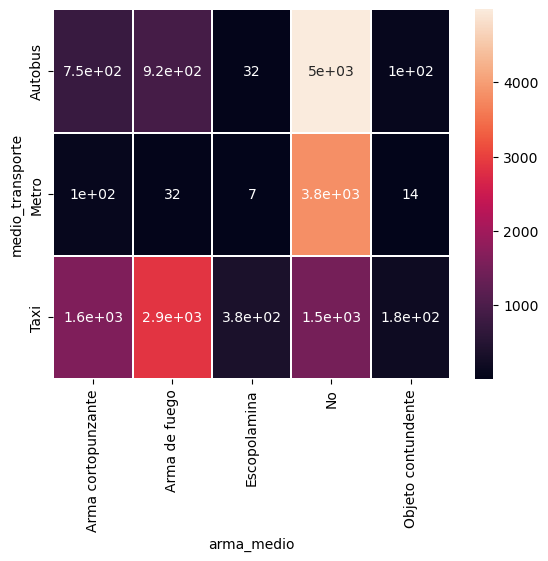

In [11]:
# Examining transportation method and weapon correlation
cross_tab = pd.crosstab(df["medio_transporte"], df["arma_medio"])
f = sns.heatmap(cross_tab, annot=True, linewidth=0.2)

Some more insight... if you're in a taxi and get robbed it wil most likely be at gunpoint while in the bus most likely they won't show a weapon. This is consistent with my research that phone snatching is extremely common...

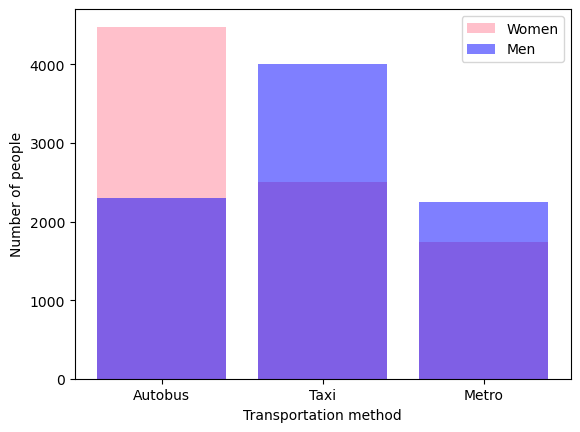

In [12]:
# Let's look at gender a bit. Recall that both genders seemed equally affected, 
# but how does this change with transportation method?

data = df[df["sexo"] == "Mujer"]["medio_transporte"].value_counts()
x = data.index.values
y = data.values

plt.bar(x, y, label="Women", color="pink")
data = df[df["sexo"] == "Hombre"]["medio_transporte"].value_counts()
x = data.index.values
y = data.values
plt.bar(x, y, label="Men", alpha=0.5, color="blue")
plt.xlabel("Transportation method")
plt.ylabel("Number of people")
f = plt.legend()
f = plt.show()


Women are getting robbed on the buses a lot, men need to be worried about taxis. Most websites discussing travel to Colombia emphasize to never hail a taxi from the street. Always use Uber, Cabify or some verified app. A criminal taxi driver could pick you up, then a couple of thugs. Then they drive you around in paseo millionario style ('millionaire ride' or express kidnapping) where you are taken to atms and are told to withdraw all of your money and max out all of your cards... while at gunpoint likely.

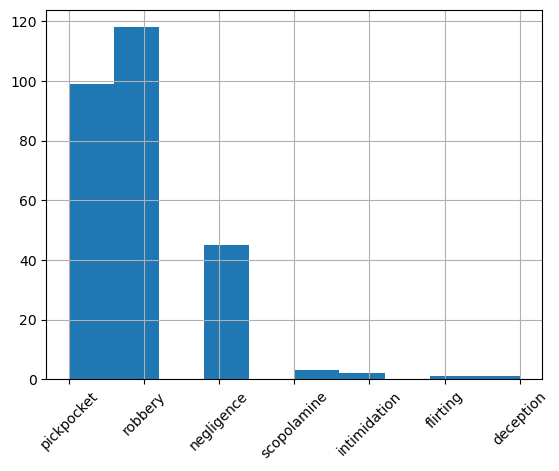

In [13]:
# Now focusing on me...

# I'm 30 and a dude... let's see what methods (modalities) are being used to steal stuff...
me = df.loc[(df["edad"] == 30) & (df["sexo"] == "Hombre")] # 30 year old man
me["modalidad"].hist()
ticks = plt.xticks(np.arange(me["modalidad"].nunique()), labels=["pickpocket", "robbery", "negligence", "scopolamine", "intimidation", "flirting", "deception"], rotation=45)


So direct robbery (likely just be showing a weapon) seems to be very popular along with pick pocketing.
Negligence is not trivial either.

Tecnología                                            133
Dinero, joyas, piedras preciosas y título valor        70
Documentos                                             33
Prendas de vestir y accesorios                         22
Maquinaria y equipo                                     2
Sin dato mercancías                                     2
Alimento                                                2
Electrodomésticos                                       2
Otros elementos                                         1
Accesorios militares, policía o vigilancia privada      1
Herramientas                                            1
Name: categoria_bien, dtype: int64


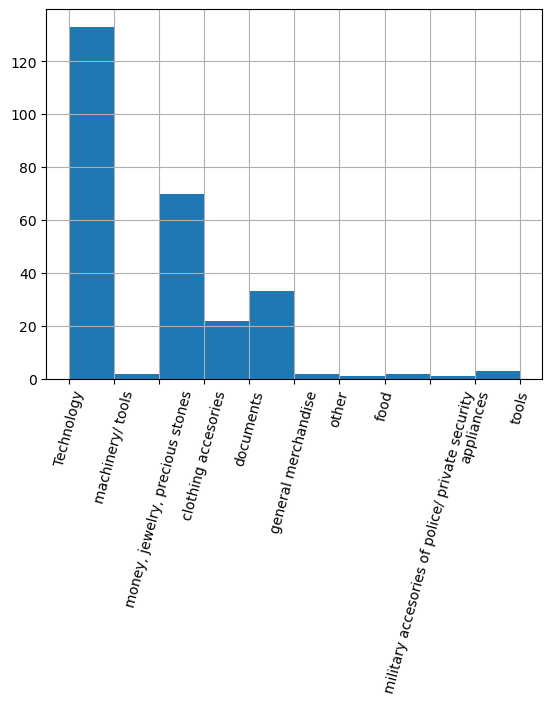

In [14]:
# what is being stolen from 30 yr old males... tranlsation on the graph itself
print(me["categoria_bien"].value_counts())
me["categoria_bien"].hist()
labels = ["Technology", "machinery/ tools", "money, jewelry, precious stones", "clothing accesories", "documents", "general merchandise", "other", "food", "military accesories of police/ private security", "appliances", "tools"]
ticks = plt.xticks(np.arange(me["categoria_bien"].nunique()), labels=labels, rotation=75)


Looks like technology (guessing cell phones), money and other valuables, along with documents (such as passports) are the most common things stolen

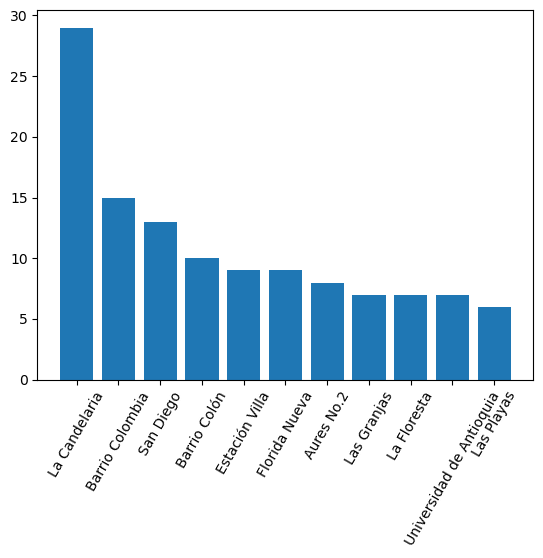

In [15]:
# Lets see which neighborhoods are worst

raw_series = me["nombre_barrio"].value_counts()
data = raw_series.loc[lambda m: m > 5]

x = data.index.values
y = data.values

plt.bar(x, y)
f = plt.xticks(rotation=60)

So the worst neighborhoods are la candelaria, barrio colombia and san diego

In [16]:
# Making x and y now...
def make_X_y(df):
    str_y = df["medio_transporte"]
    X = df.drop(["medio_transporte"], axis=1)
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(str_y)
    print(le.classes_)
    return X, y


In [17]:
# All data
X, y = make_X_y(df)


['Autobus' 'Metro' 'Taxi']


In [18]:
# Split dataset
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=11)


Now we can normalize a bit

In [19]:
scaler = preprocessing.MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Cluster time

2 clusters ---
Homogeneity score: 0.196
Completeness score: 0.311
3 clusters ---
Homogeneity score: 0.204
Completeness score: 0.201
4 clusters ---
Homogeneity score: 0.221
Completeness score: 0.174
5 clusters ---
Homogeneity score: 0.218
Completeness score: 0.147
6 clusters ---
Homogeneity score: 0.208
Completeness score: 0.128
7 clusters ---
Homogeneity score: 0.281
Completeness score: 0.158
8 clusters ---
Homogeneity score: 0.294
Completeness score: 0.155
9 clusters ---
Homogeneity score: 0.219
Completeness score: 0.109
10 clusters ---
Homogeneity score: 0.289
Completeness score: 0.140
11 clusters ---
Homogeneity score: 0.226
Completeness score: 0.105
12 clusters ---
Homogeneity score: 0.312
Completeness score: 0.136
13 clusters ---
Homogeneity score: 0.271
Completeness score: 0.117
14 clusters ---
Homogeneity score: 0.294
Completeness score: 0.123
15 clusters ---
Homogeneity score: 0.310
Completeness score: 0.127
16 clusters ---
Homogeneity score: 0.292
Completeness score: 0.119
17 

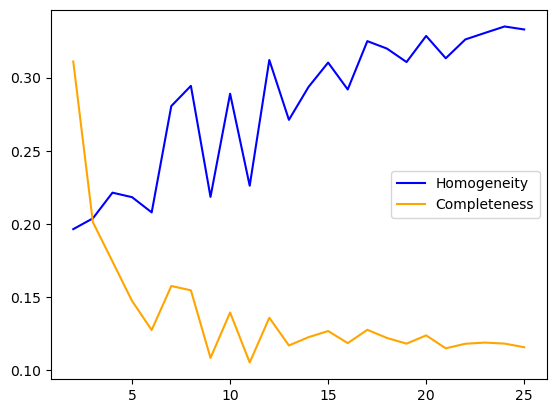

In [20]:
# We will see what the clusters look like, measuring homogeneity and completeness
homs = []
coms = []
for k in range(2, 26):
    centr, pred, inert = cluster.k_means(scaled_X_train, n_clusters=k, random_state=7)
    hom = metrics.homogeneity_score(y_train, pred)
    com = metrics.completeness_score(y_train, pred)
    homs.append(hom)
    coms.append(com)
    print("================\n{0} clusters ---\nHomogeneity score: {1:.3f}\nCompleteness score: {2:.3f}".format(k, hom, com))
plt.plot(np.arange(2, 26), homs, label="Homogeneity", color="blue")
plt.plot(np.arange(2, 26), coms, label="Completeness", color="orange")
plt.legend()
plt.show()


None of these are good... :(

Supervised learning:
Lets test out some models for seeing where these incidents occur by: metro, taxi or bus 

In [21]:
# The expectation is to explore at least 4 models (including clustering) 
# so let's run five models here (in addition to the clustering we already did)
models = [svm.SVC(), tree.DecisionTreeClassifier(), ensemble.RandomForestClassifier(), linear_model.SGDClassifier(), neural_network.MLPClassifier()]
names = ["SVM", "Tree", "Random Forest", "SGD Classifier", "ANN"]

print("0: Bus, 1: Metro, 2: Taxi")
def compare_models(model, X, y):
    acs = []
    kf = model_selection.KFold(3)
    for i, (tr, val) in enumerate(kf.split(X)):
        model.fit(scaled_X_train[tr], y_train[tr])
        pred = model.predict(scaled_X_train[val])
        ac = metrics.accuracy_score(y_train[val], pred)
        acs.append(ac)
    return np.mean(acs)

for i, (model, name) in enumerate(zip(models, names)):
    ac = compare_models(model, scaled_X_train, y_train)
    print("\n-------------------- {0} ---------------------\nAccuracy: {1:.3f}".format(name, ac))



0: Bus, 1: Metro, 2: Taxi

-------------------- SVM ---------------------
Accuracy: 0.748

-------------------- Tree ---------------------
Accuracy: 0.775

-------------------- Random Forest ---------------------
Accuracy: 0.786

-------------------- SGD Classifier ---------------------
Accuracy: 0.746


/Users/robinson/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/robinson/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



-------------------- ANN ---------------------
Accuracy: 0.748


/Users/robinson/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The neural networks aren't converging...
Out of these it looked like random forest performed the best... now to hyperparam tune...

In [22]:
# Warning - This code took substantial time to run on my (2015) mac book pro
model = ensemble.RandomForestClassifier()

params = {"n_estimators": [50, 100, 300], "min_samples_split": [2, 5, 50], "max_depth": [50, 100]}
grid = model_selection.GridSearchCV(model, param_grid=params, scoring="accuracy")

grid.fit(scaled_X_train, y_train)
print("Testing accuracy: {0:.1f}%".format(grid.best_score_ * 100))
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)


Testing accuracy: 79.9%
Best params: {'max_depth': 100, 'min_samples_split': 5, 'n_estimators': 300}


In [23]:
best_model = ensemble.RandomForestClassifier(n_estimators=300, min_samples_split=5, max_depth=100)
best_model.fit(scaled_X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=5, n_estimators=300)

Testing accuracy: 80.2%


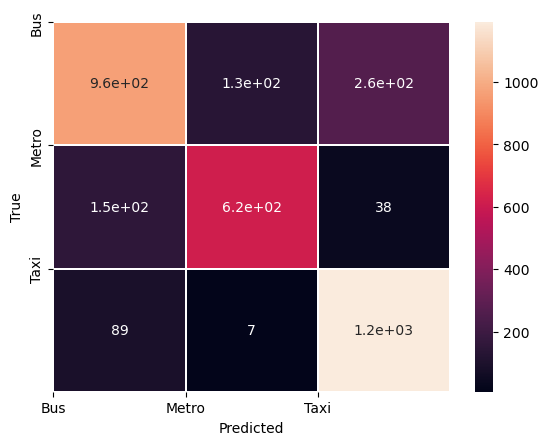

In [24]:
# Testing now

pred = best_model.predict(scaled_X_test)
acc = metrics.accuracy_score(y_test, pred)
cm = metrics.confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True, linewidth=0.1)
plt.xlabel("Predicted")
plt.xticks([0, 1, 2], ["Bus", "Metro", "Taxi"])
plt.ylabel("True")
plt.yticks([0, 1, 2], ["Bus", "Metro", "Taxi"])
print("Testing accuracy: {0:.1f}%".format(acc * 100))


So along the main diagonal (where true=predicted) the numbers are good.

There are several common misacategorizations:
1. When a bus was the transportation method involved in the robbery, but the model predicted a taxi
2. When the metro was the transportation method involved in the robbery, but the model predicted a bus
3. When a bus was the transportation method involved in the robbery, but the model predicted metro





In [25]:
# Let's put in some likely situations for me

# fecha_hecho = .5 around the middle of the data since it was scaled to [0, 1]
# age = 30
# sex = Hombre

# Biggest theft hazards are pickpocket, direct robbery, negligence
modalities = ["modalidad_Cosquilleo", "modalidad_Atraco", "modalidad_Descuido"]
# Object stolen - technology (cell phone likely) or money/ valuables
stolen_objects = ["categoria_bien_Tecnología", "categoria_bien_Dinero, joyas, piedras preciosas y título valor"]
# Let's look at knife or guns risks or none 
firearms = ["arma_medio_Arma cortopunzante", "arma_medio_Arma de fuego", "arma_medio_No"]
# A couple neighborhoods that look good to visit from a travel website
# https://www.lonelyplanet.com/articles/best-neighborhoods-in-medellin
neighborhoods = ["nombre_barrio_Barrio Colombia", "nombre_barrio_El Centro"]

data = pd.DataFrame(np.zeros((len(modalities) * len(stolen_objects) * len(firearms) * len(neighborhoods), X.shape[1])), columns=X.columns)

scaled_age = (30 - scaler.min_[1]) / (scaler.data_max_[1] - scaler.data_min_[1])

labels = []
row = 0
for mod in modalities:
    data.iloc[row].loc[mod] = 1
    for stolen_object in stolen_objects:
        data.iloc[row].loc[stolen_object] = 1
        for firearm in firearms:
            data.iloc[row].loc[firearm] = 1
            for neighborhood in neighborhoods:
                data.iloc[row].loc[neighborhood] = 1
                data.iloc[row].loc["edad"] = scaled_age
                data.iloc[row].loc["sexo_Hombre"] = 1
                data.iloc[row].loc["fecha_hecho"] = 1
                labels.append((row, mod, stolen_object, firearm, neighborhood))
                row += 1

preds = best_model.predict_proba(np.array(data))
print(data.shape[0])

print("(Row num, modality, stolen object, firearm, neighborhood)\n<BUS, METRO, TAXI>")
for label, pred in zip(labels, preds):
    print(label)
    print(np.round(pred, 2))


36
(Row num, modality, stolen object, firearm, neighborhood)
<BUS, METRO, TAXI>
(0, 'modalidad_Cosquilleo', 'categoria_bien_Tecnología', 'arma_medio_Arma cortopunzante', 'nombre_barrio_Barrio Colombia')
[0.25 0.53 0.22]
(1, 'modalidad_Cosquilleo', 'categoria_bien_Tecnología', 'arma_medio_Arma cortopunzante', 'nombre_barrio_El Centro')
[0.25 0.06 0.69]
(2, 'modalidad_Cosquilleo', 'categoria_bien_Tecnología', 'arma_medio_Arma de fuego', 'nombre_barrio_Barrio Colombia')
[0.27 0.08 0.65]
(3, 'modalidad_Cosquilleo', 'categoria_bien_Tecnología', 'arma_medio_Arma de fuego', 'nombre_barrio_El Centro')
[0.25 0.06 0.69]
(4, 'modalidad_Cosquilleo', 'categoria_bien_Tecnología', 'arma_medio_No', 'nombre_barrio_Barrio Colombia')
[0.51 0.24 0.25]
(5, 'modalidad_Cosquilleo', 'categoria_bien_Tecnología', 'arma_medio_No', 'nombre_barrio_El Centro')
[0.25 0.06 0.69]
(6, 'modalidad_Cosquilleo', 'categoria_bien_Dinero, joyas, piedras preciosas y título valor', 'arma_medio_Arma cortopunzante', 'nombre_barri

Taxis definitely seem to be the highest risk here... but bus significant too

## Conclusions for robbery risks for a 30 year old male in Medellin, Colombia

### Data analysis/ visualization has uncovered:
1. Technology and then money/ jewelry are most likely to be stolen
2. Pick pockets and direct robbery are most common
3. The worse neighborhoods in Medellin are La Candelaria, Barrio Colombia and San Diego
4. Taxis are most dangerous for men (more men are robbed in taxi than other transportation means)
5. Firearms are the most popular method of robbing when using a taxi

### Unsupervised Learning (clustering):
1. Clustering was fairly unsuccessful, the data did not seem to naturally cluster well, perhaps this was caused by the use of dummy variables. 3 Clusters did produce the highest sum of completeness and homogeneity although both scores were quite poor, 0.20

### Supervised Learning (various methods):
1. Random forest proved to be best for predicting transportation method used when being robbed. It's accuracy was found to be nearly 80%.
2. This model could be useful for finding the most dangerous transportation method based on neighborhood and other factors.





### Future work and thoughts
It would be interesting to see what the effect of group size is in robbery, both in terms of multiple assailants or multiple victims. Unfortunately, this dataset does not provide this information. I did not do analysis on the time of day, but I think this would be worth investigating eventually. As my hunch is that a later time in the day would increase the chance for robbery. 

Since starting the project, my friend who was planning on going with me has bailed due to trip expenses. Being by myself will certainly increase the risk, hopefully what I have learned from this project will help minimize the risks I take. I'll stay on the alert for phone snatching, sketchy taxis and scopalmine...

Overall, I think I will be targeted more as being a mono (a 'light skin'), but the crime rate of the city is probably less than Chicago. Exercising common sense and being alert will be my best defense...